# Stock Market Prediction

In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv('stock.csv')
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [3]:
df.shape

(2035, 8)

In [4]:
df1=df.reset_index()['Low']

In [5]:
df1.head()

0    230.20
1    231.10
2    232.50
3    232.00
4    230.75
Name: Low, dtype: float64

In [6]:
df1.shape

(2035,)

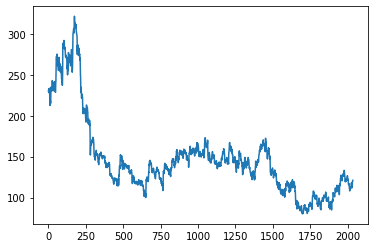

In [7]:
from matplotlib import pyplot as plt
plt.plot(df1)

In [8]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [9]:
df1

array([[0.62156011],
       [0.6252845 ],
       [0.63107801],
       ...,
       [0.16656321],
       [0.16656321],
       [0.16987378]])

In [10]:
#In case of timeseries data the next data is always dependent on previous data so we cannot split randomly.
train_size=int(len(df1)*0.65)
test_size=len(df1)-train_size
train,test=df1[0:train_size,:],df1[train_size:len(df1),:1]

In [11]:
len(train)

1322

In [12]:
len(test)

713

In [13]:
def create(data,time=1):
    dataX,dataY=[],[]
    for i in range(len(data)-time-1):
        a=data[i:(i+time),0]
        dataX.append(a)
        dataY.append(data[i + time,0])
    return np.array(dataX),np.array(dataY)

In [14]:
time=100
X_train,y_train=create(train,time)
X_test,y_test=create(test,time)

In [15]:
X_train.shape

(1221, 100)

In [16]:
y_train.shape

(1221,)

In [17]:
X_train=X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test=X_test.reshape(X_test.shape[0],X_test.shape[1],1)

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense 
from tensorflow.keras.layers import LSTM 

In [19]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [21]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=50,batch_size=64,verbose=1)

Epoch 1/50
20/20 [==============================] - 22s 555ms/step - loss: 0.0216 - val_loss: 0.0060
Epoch 2/50
20/20 [==============================] - 8s 424ms/step - loss: 0.0031 - val_loss: 0.0015
Epoch 3/50
20/20 [==============================] - 8s 423ms/step - loss: 0.0019 - val_loss: 9.3640e-04
Epoch 4/50
20/20 [==============================] - 8s 418ms/step - loss: 0.0019 - val_loss: 0.0013
Epoch 5/50
20/20 [==============================] - 8s 426ms/step - loss: 0.0017 - val_loss: 8.5679e-04
Epoch 6/50
20/20 [==============================] - 9s 432ms/step - loss: 0.0016 - val_loss: 0.0018
Epoch 7/50
20/20 [==============================] - 8s 418ms/step - loss: 0.0016 - val_loss: 0.0010
Epoch 8/50
20/20 [==============================] - 8s 409ms/step - loss: 0.0015 - val_loss: 0.0011
Epoch 9/50
20/20 [==============================] - 8s 422ms/step - loss: 0.0014 - val_loss: 8.6858e-04
Epoch 10/50
20/20 [==============================] - 8s 422ms/step - loss: 0.0015 - val

In [22]:
train_p=model.predict(X_train)
test_p=model.predict(X_test)

20/20 [==============================] - 2s 107ms/step


In [23]:
train_p=scaler.inverse_transform(train_p)
test_p=scaler.inverse_transform(test_p)

In [24]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_test,test_p))

118.8721652494769

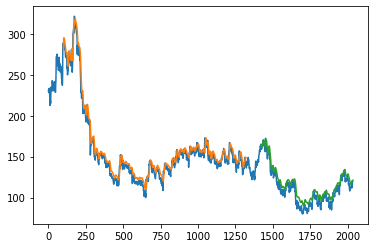

In [25]:
look_back=100
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_p)+look_back, :] = train_p
testPredictPlot = np.empty_like(df1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_p)+(look_back*2)+1:len(df1)-1, :] = test_p
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In this graph the blue line is actual data,the orange is training data prediction and green is testing data prediction.